<a href="https://colab.research.google.com/github/alxmzr/Colab/blob/main/Trading_Prediction_System_With_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Trading System With Python
# https://towardsdatascience.com/how-to-create-a-fully-automated-ai-based-trading-system-with-python-708503c1a907

In [ ]:
# pip install yfinance

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
google = yf.Ticker('GOOG')
df = google.history(period='1d', interval="1m")
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2022-09-12 09:30:00-04:00,112.290001,112.309998,112.290001,112.309998,715190,0,0
2022-09-12 09:31:00-04:00,112.330002,112.379997,112.199997,112.349998,104060,0,0
2022-09-12 09:32:00-04:00,112.360001,112.510002,112.330002,112.489998,111839,0,0
2022-09-12 09:33:00-04:00,112.480003,112.609100,112.449997,112.510002,110136,0,0
2022-09-12 09:34:00-04:00,112.489998,112.529999,112.349998,112.370003,99605,0,0


In [ ]:
df = google.history(period='1d', interval="1m")
df = df[['Low']]
df.head()

,Low
Datetime,
2022-09-12 09:30:00-04:00,112.290001
2022-09-12 09:31:00-04:00,112.199997
2022-09-12 09:32:00-04:00,112.330002
2022-09-12 09:33:00-04:00,112.449997
2022-09-12 09:34:00-04:00,112.349998


In [ ]:
df['date'] = pd.to_datetime(df.index).time
df.set_index('date', inplace=True)
df.head()

,Low
date,
09:30:00,112.290001
09:31:00,112.199997
09:32:00,112.330002
09:33:00,112.449997
09:34:00,112.349998


In [ ]:
X = df.index.values
y = df['Low'].values
# The split point is the 10% of the dataframe length
offset = int(0.10*len(df))
X_train = X[:-offset]
y_train = y[:-offset]
X_test  = X[-offset:]
y_test  = y[-offset:]

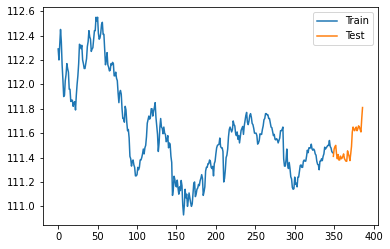

In [ ]:
plt.plot(range(0,len(y_train)),y_train, label='Train')
plt.plot(range(len(y_train),len(y)),y_test,label='Test')
plt.legend()
plt.show()

In [ ]:
model = ARIMA(y_train, order=(5,0,1)).fit()
forecast = model.forecast(steps=1)[0]

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
print(f'Real data for time 0: {y_train[len(y_train)-1]}')
print(f'Real data for time 1: {y_test[0]}')
print(f'Pred data for time 1: {forecast}')

Real data for time 0: 111.44000244140625
Real data for time 1: 111.41000366210938
Pred data for time 1: 111.45077547629624
